# Backtesting iterativo

Vogliamo fare ora una classe che sia in grado di investire quantitativi di denaro stabiliti, consideri anche le commissioni e agisca mentre il tempo avanza. Quindi il nostro backtesting sarà iterativo, fatto mentre il tempo avanza (simulato dalla variabile **t**).

## Iteractive Base Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Paolo\AppData\Local\Temp\ipykernel_18612\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# WITH OANDA
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [3]:
# WITH IBKR
# ib.disconnect()
import pandas as pd
from ib_insync import *
util.startLoop()  # not necessary in scripts
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7496 clientId=1>

In [4]:
class IteractiveBase():
    def __init__(self, symbol, start, end, bilancio):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = bilancio
        self.current_balance = bilancio
        self.get_data()
        
    def __repr__(self):
        return "IterativeBase(symbol = "+self.symbol+", start = "+str(self.start)+", end = "+str(self.end)+ \
            ", initial balance = "+str(self.initial_balance)+", current balance = "+str(self.current_balance)+")"
        
# # WITH OANDA
#     def get_data(self): # carica i dati
#         df=pd.DataFrame()
#         df["bid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["c"]
#         df["ask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["c"]
#         df["Abid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["o"]
#         df["Aask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["o"]
#         df.index.names = ['date']
#         df["prezzo"] = (df.ask+df.bid)/2
#         df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
#         self.data=df
        
# WITH IBKR
    def get_data(self): # carica i dati
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "BID", useRTH = True, formatDate=2 )).set_index("date")       
        df=pd.DataFrame(index=pd.to_datetime(temp.index))
        df["bid"] = temp["close"]
        df["Abid"] = temp["open"]
        df.index = pd.to_datetime(df.index)
        
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "ASK", useRTH = True, formatDate=2 )).set_index("date")       
        temp.index = pd.to_datetime(temp.index)
        df["ask"] = temp["close"]
        df["Aask"] = temp["open"]
        
        df["prezzo"] = (df.ask+df.bid)/2
        df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
        self.data=df

    def plot_data(self, cols=None):
        if cols is None:
            cols="prezzo"
        self.data[cols].plot(figsize=(25,15), title=self.symbol)

In [5]:
# WITH OANDA 
# bc=IteractiveBase("EUR_USD","2012-09-24","2024-09-24",100000)
# WITH IBKR
bc = IteractiveBase(Forex("EURUSD"),"12 Y","20240924 00:00:00",100000)

In [6]:
bc.data

bid     Abid      ask     Aask    prezzo    logRet
date                                                              
2012-09-28  1.28585  1.29115  1.28600  1.29135  1.285925       NaN
2012-10-01  1.28875  1.28420  1.28890  1.28505  1.288825  0.002253
2012-10-02  1.29190  1.28865  1.29200  1.28865  1.291950  0.002422
2012-10-03  1.29050  1.29165  1.29055  1.29175  1.290525 -0.001104
2012-10-04  1.30175  1.29020  1.30185  1.29070  1.301800  0.008699
...             ...      ...      ...      ...       ...       ...
2024-09-18  1.11185  1.11130  1.11190  1.11175  1.111875  0.000450
2024-09-19  1.11615  1.11120  1.11620  1.11205  1.116175  0.003860
2024-09-20  1.11575  1.11590  1.11695  1.11645  1.116350  0.000157
2024-09-23  1.11110  1.11595  1.11115  1.11735  1.111125 -0.004691
2024-09-24  1.11795  1.10965  1.11800  1.11315  1.117975  0.006146

[3108 rows x 6 columns]

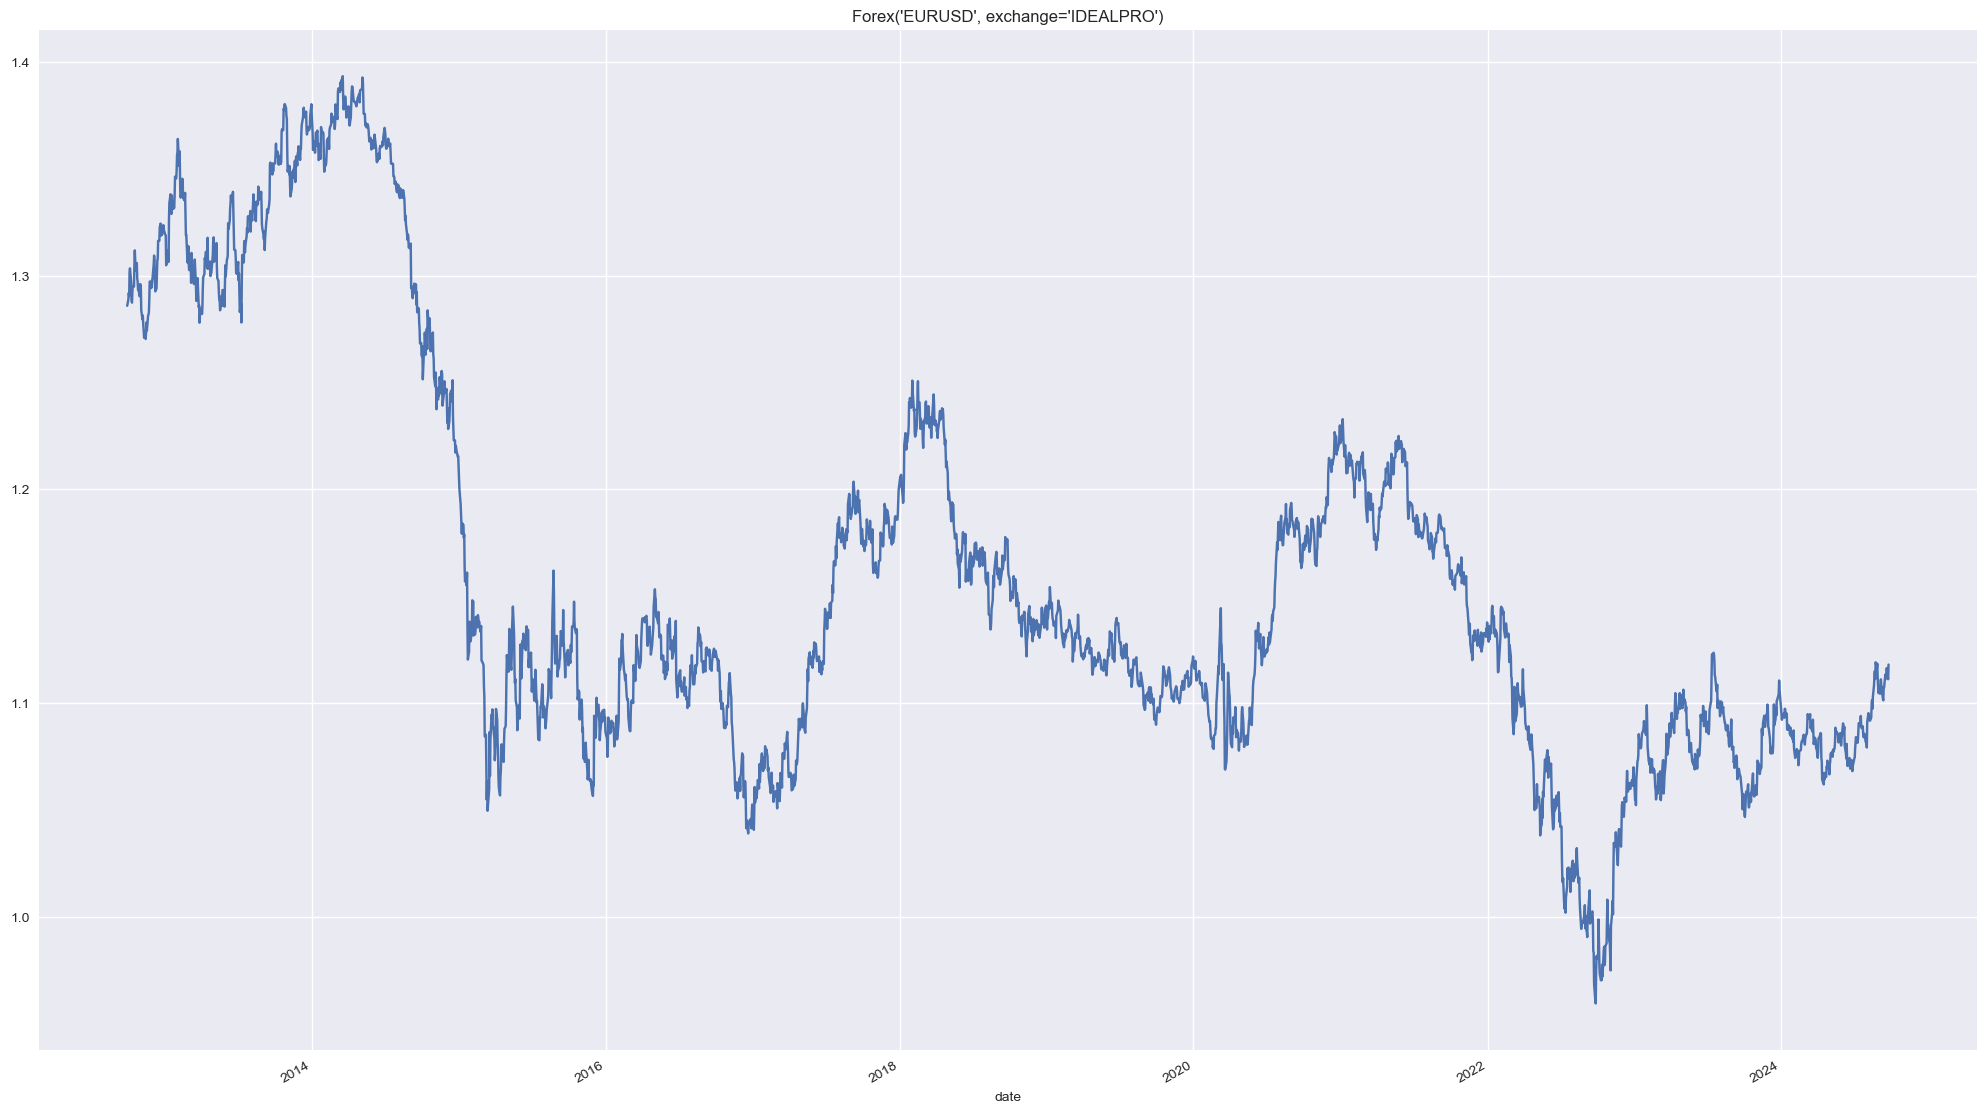

In [7]:
bc.plot_data()

In [8]:
class IteractiveBase():
    def __init__(self, symbol, start, end, bilancio):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = bilancio
        self.current_balance = bilancio
        self.get_data()
        
    def __repr__(self):
        return "IterativeBase(symbol = "+self.symbol+", start = "+str(self.start)+", end = "+str(self.end)+ \
            ", initial balance = "+str(self.initial_balance)+", current balance = "+str(self.current_balance)+")"
        
# # WITH OANDA
#     def get_data(self): # carica i dati
#         df=pd.DataFrame()
#         df["bid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["c"]
#         df["ask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["c"]
#         df["Abid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["o"]
#         df["Aask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["o"]
#         df.index.names = ['date']
#         df["prezzo"] = (df.ask+df.bid)/2
#         df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
#         self.data=df
        
# WITH IBKR
    def get_data(self): # carica i dati
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "BID", useRTH = True, formatDate=2 )).set_index("date")       
        df=pd.DataFrame(index=pd.to_datetime(temp.index))
        df["bid"] = temp["close"]
        df["Abid"] = temp["open"]
        df.index = pd.to_datetime(df.index)
        
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "ASK", useRTH = True, formatDate=2 )).set_index("date")       
        temp.index = pd.to_datetime(temp.index)
        df["ask"] = temp["close"]
        df["Aask"] = temp["open"]
        
        df["prezzo"] = (df.ask+df.bid)/2
        df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
        self.data=df

    def plot_data(self, cols=None):
        if cols is None:
            cols="prezzo"
        self.data[cols].plot(figsize=(25,15), title=self.symbol)

# NUOVO!!!
    def get_values(self,t):
        date=str(self.data.index[t])
        bid=self.data.bid.iloc[t]
        ask=self.data.ask.iloc[t]
        price=self.data.prezzo.iloc[t]
        return date,price,bid,ask
    

In [9]:
# WITH OANDA 
# bc=IteractiveBase("EUR_USD","2012-09-24","2024-09-24",100000)
# WITH IBKR
bc = IteractiveBase(Forex("EURUSD"),"12 Y","20240924 00:00:00",100000)

In [10]:
bc.get_values(55)

('2012-12-14 00:00:00', 1.316325, 1.3163, 1.31635)

In [11]:
bc.get_values(-1)

('2024-09-24 00:00:00', 1.117975, 1.11795, 1.118)

In [12]:
class IteractiveBase():
    def __init__(self, symbol, start, end, bilancio):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = bilancio
        self.current_balance = bilancio
        self.get_data()
# NUOVO!!!
        self.units = 0
        self.trades = 0
        
    def __repr__(self):
        return "IterativeBase(symbol = "+self.symbol+", start = "+str(self.start)+", end = "+str(self.end)+ \
            ", initial balance = "+str(self.initial_balance)+", current balance = "+str(self.current_balance)+")"
        
# # WITH OANDA
#     def get_data(self): # carica i dati
#         df=pd.DataFrame()
#         df["bid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["c"]
#         df["ask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["c"]
#         df["Abid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["o"]
#         df["Aask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["o"]
#         df.index.names = ['date']
#         df["prezzo"] = (df.ask+df.bid)/2
#         df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
#         self.data=df
        
# WITH IBKR
    def get_data(self): # carica i dati
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "BID", useRTH = True, formatDate=2 )).set_index("date")       
        df=pd.DataFrame(index=pd.to_datetime(temp.index))
        df["bid"] = temp["close"]
        df["Abid"] = temp["open"]
        df.index = pd.to_datetime(df.index)
        
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "ASK", useRTH = True, formatDate=2 )).set_index("date")       
        temp.index = pd.to_datetime(temp.index)
        df["ask"] = temp["close"]
        df["Aask"] = temp["open"]
        
        df["prezzo"] = (df.ask+df.bid)/2
        df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
        self.data=df

    def plot_data(self, cols=None):
        if cols is None:
            cols="prezzo"
        self.data[cols].plot(figsize=(25,15), title=self.symbol)

    def get_values(self,t):
        date=str(self.data.index[t])
        bid=self.data.bid.iloc[t]
        ask=self.data.ask.iloc[t]
        price=self.data.prezzo.iloc[t]
        return date,price,bid,ask

# NUOVO!!!           
    def buy(self,t,units=None,amount=None):
        date,price,bid,ask = self.get_values(t)
        if amount is not None:
            units = int(amount/ask)
        self.current_balance -= units*ask
        self.units += units
        self.trades += 1
        print(str(date)+" | COMPRO "+str(units)+" a "+str(round(ask,4)))
    
    def print_current_situation(self,t):
        date,price,bid,ask = self.get_values(t)
        if self.units>0:
            valore = self.units*bid
        else:
            valore = self.units*ask
        print(str(date)+" | INVESTITO "+str(round(valore,0))+ " | TOTALE "+str(round(self.current_balance+valore,0)))
        

In [13]:
# WITH OANDA 
# bc=IteractiveBase("EUR_USD","2012-09-24","2024-09-24",100000)
# WITH IBKR
bc = IteractiveBase(Forex("EURUSD"),"12 Y","20240924 00:00:00",100000)

In [14]:
bc.buy(20,units=400)

2012-10-26 00:00:00 | COMPRO 400 a 1.294


In [15]:
bc.print_current_situation(20)

2012-10-26 00:00:00 | INVESTITO 518.0 | TOTALE 100000.0


In [16]:
bc.print_current_situation(30)

2012-11-09 00:00:00 | INVESTITO 508.0 | TOTALE 99991.0


In [17]:
bc.buy(70,amount=7000)

2013-01-08 00:00:00 | COMPRO 5351 a 1.3082


In [18]:
bc.print_current_situation(70)

2013-01-08 00:00:00 | INVESTITO 7523.0 | TOTALE 100005.0


In [19]:
bc.print_current_situation(-1)

2024-09-24 00:00:00 | INVESTITO 6429.0 | TOTALE 98912.0


In [20]:
class IteractiveBase():
    def __init__(self, symbol, start, end, bilancio):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = bilancio
        self.current_balance = bilancio
        self.get_data()
        self.units = 0
        self.trades = 0
        
    def __repr__(self):
        return "IterativeBase(symbol = "+self.symbol+", start = "+str(self.start)+", end = "+str(self.end)+ \
            ", initial balance = "+str(self.initial_balance)+", current balance = "+str(self.current_balance)+")"
        
# # WITH OANDA
#     def get_data(self): # carica i dati
#         df=pd.DataFrame()
#         df["bid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["c"]
#         df["ask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["c"]
#         df["Abid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["o"]
#         df["Aask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["o"]
#         df.index.names = ['date']
#         df["prezzo"] = (df.ask+df.bid)/2
#         df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
#         self.data=df
        
# WITH IBKR
    def get_data(self): # carica i dati
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "BID", useRTH = True, formatDate=2 )).set_index("date")       
        df=pd.DataFrame(index=pd.to_datetime(temp.index))
        df["bid"] = temp["close"]
        df["Abid"] = temp["open"]
        df.index = pd.to_datetime(df.index)
        
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "ASK", useRTH = True, formatDate=2 )).set_index("date")       
        temp.index = pd.to_datetime(temp.index)
        df["ask"] = temp["close"]
        df["Aask"] = temp["open"]
        
        df["prezzo"] = (df.ask+df.bid)/2
        df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
        self.data=df

    def plot_data(self, cols=None):
        if cols is None:
            cols="prezzo"
        self.data[cols].plot(figsize=(25,15), title=self.symbol)

    def get_values(self,t):
        date=str(self.data.index[t])
        bid=self.data.bid.iloc[t]
        ask=self.data.ask.iloc[t]
        price=self.data.prezzo.iloc[t]
        return date,price,bid,ask

    def buy(self,t,units=None,amount=None):
        date,price,bid,ask = self.get_values(t)
        if amount is not None:
            units = int(amount/ask)
        self.current_balance -= units*ask
        self.units += units
        self.trades += 1
        print(str(date)+" | COMPRO "+str(units)+" a "+str(round(ask,4)))
    
    def print_current_situation(self,t):
        date,price,bid,ask = self.get_values(t)
        if self.units>0:
            valore = self.units*bid
        else:
            valore = self.units*ask
        print(str(date)+" | INVESTITO "+str(round(valore,0))+ " | TOTALE "+str(round(self.current_balance+valore,0)))
        
# NUOVO!!!
    def sell(self,t,units=None,amount=None):
        date,price,bid,ask = self.get_values(t)
        if amount is not None:
            units = int(amount/bid)
        self.current_balance += units*bid
        self.units -= units
        self.trades += 1
        print(str(date)+" | VENDO "+str(units)+" a "+str(round(bid,4)))

    def close(self,t):
        date,price,bid,ask = self.get_values(t)
        if self.units>0:
            self.sell(t,units=self.units)
        else:
            self.buy(t,units=-self.units) # attenzione al meno!
        performance = ( self.current_balance - self.initial_balance ) / self.initial_balance
        print("----------- TUTTO CHIUSO -----------")
        print(str(date)+" | BILANCIO "+str(round(self.current_balance,0))+" | PERFORMANCE "+str(round(performance*100,2))+"%"
              +" | TRADES "+str(self.trades))

In [21]:
# WITH OANDA 
# bc=IteractiveBase("EUR_USD","2012-09-24","2024-09-24",100000)
# WITH IBKR
bc = IteractiveBase(Forex("EURUSD"),"12 Y","20240924 00:00:00",100000)

In [22]:
bc.sell(30,units=5000)

2012-11-09 00:00:00 | VENDO 5000 a 1.271


In [23]:
bc.print_current_situation(30)

2012-11-09 00:00:00 | INVESTITO -6355.0 | TOTALE 100000.0


In [24]:
bc.print_current_situation(50)

2012-12-07 00:00:00 | INVESTITO -6464.0 | TOTALE 99891.0


In [25]:
bc.buy(50,units=8000)

2012-12-07 00:00:00 | COMPRO 8000 a 1.2928


In [26]:
bc.print_current_situation(50)

2012-12-07 00:00:00 | INVESTITO 3878.0 | TOTALE 99890.0


In [27]:
bc.close(80)

2013-01-22 00:00:00 | VENDO 3000 a 1.3322
----------- TUTTO CHIUSO -----------
2013-01-22 00:00:00 | BILANCIO 100009.0 | PERFORMANCE 0.01% | TRADES 3


In [28]:
class IteractiveBase():
    def __init__(self, symbol, start, end, bilancio,fee=(0,0,0)):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = bilancio
        self.current_balance = bilancio
        self.get_data()
        self.units = 0
        self.trades = 0
# NUOVO!!!
        self.fee=fee # (commissione in percentuale, commissione minima, commissione massima)
        
    def __repr__(self):
        return "IterativeBase(symbol = "+self.symbol+", start = "+str(self.start)+", end = "+str(self.end)+ \
            ", initial balance = "+str(self.initial_balance)+", current balance = "+str(self.current_balance)+")"
        
# # WITH OANDA
#     def get_data(self): # carica i dati
#         df=pd.DataFrame()
#         df["bid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["c"]
#         df["ask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["c"]
#         df["Abid"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "B")["o"]
#         df["Aask"]=api.get_history(instrument=self.symbol, start=self.start, end=self.end , granularity = "D", price = "A")["o"]
#         df.index.names = ['date']
#         df["prezzo"] = (df.ask+df.bid)/2
#         df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
#         self.data=df
        
# WITH IBKR
    def get_data(self): # carica i dati
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "BID", useRTH = True, formatDate=2 )).set_index("date")       
        df=pd.DataFrame(index=pd.to_datetime(temp.index))
        df["bid"] = temp["close"]
        df["Abid"] = temp["open"]
        df.index = pd.to_datetime(df.index)
        
        temp=pd.DataFrame(ib.reqHistoricalData( self.symbol, endDateTime = self.end, barSizeSetting="1 day", durationStr=self.start, 
                                  whatToShow= "ASK", useRTH = True, formatDate=2 )).set_index("date")       
        temp.index = pd.to_datetime(temp.index)
        df["ask"] = temp["close"]
        df["Aask"] = temp["open"]
        
        df["prezzo"] = (df.ask+df.bid)/2
        df["logRet"]=np.log(df.prezzo/df.prezzo.shift(1))
        self.data=df

    def plot_data(self, cols=None):
        if cols is None:
            cols="prezzo"
        self.data[cols].plot(figsize=(25,15), title=self.symbol)

    def get_values(self,t):
        date=str(self.data.index[t])
        bid=self.data.bid.iloc[t]
        ask=self.data.ask.iloc[t]
        price=self.data.prezzo.iloc[t]
        return date,price,bid,ask

    def buy(self,t,units=None,amount=None):
        date,price,bid,ask = self.get_values(t)
        if amount is not None:
            units = int(amount/ask)
        self.current_balance -= units*ask
        commissione=min(max(units*ask*self.fee[0],self.fee[1]),self.fee[2]) # il massimo tra la percentuale e la minima, poi non oltre la massima
        self.current_balance -= commissione
        self.units += units
        self.trades += 1
        print(str(date)+" | COMPRO "+str(units)+" a "+str(round(ask,4))+" | COMMISSIONE "+str(round(commissione,2)))
    
    def print_current_situation(self,t):
        date,price,bid,ask = self.get_values(t)
        if self.units>0:
            valore = self.units*bid
        else:
            valore = self.units*ask
        print(str(date)+" | INVESTITO "+str(round(valore,0))+ " | TOTALE "+str(round(self.current_balance+valore,0)))
        
    def sell(self,t,units=None,amount=None):
        date,price,bid,ask = self.get_values(t)
        if amount is not None:
            units = int(amount/bid)
        self.current_balance += units*bid
        commissione=min(max(units*self.fee[0],self.fee[1]),self.fee[2]) # il massimo tra la percentuale e la minima, poi non oltre la massima
        self.current_balance -= commissione # attenzione che il segno è sempre meno
        self.units -= units
        self.trades += 1
        print(str(date)+" | VENDO "+str(units)+" a "+str(round(ask,4))+" | COMMISSIONE "+str(round(commissione,2)))

    def close(self,t):
        date,price,bid,ask = self.get_values(t)
        if self.units>0:
            self.sell(t,units=self.units)
        else:
            self.buy(t,units=-self.units) # attenzione al meno!
        performance = ( self.current_balance - self.initial_balance ) / self.initial_balance
        print("----------- TUTTO CHIUSO -----------")
        print(str(date)+" | BILANCIO "+str(round(self.current_balance,0))+" | PERFORMANCE "+str(round(performance*100,2))+"%"
              +" | TRADES "+str(self.trades))

In [29]:
# WITH OANDA 
# bc=IteractiveBase("EUR_USD","2012-09-24","2024-09-24",100000,fee=(0.00002,2,0.00002*1000000))
# WITH IBKR
bc = IteractiveBase(Forex("EURUSD"),"12 Y","20240924 00:00:00",100000,fee=(0.00002,2,0.00002*1000000))

In [30]:
bc.sell(30,units=5000)

2012-11-09 00:00:00 | VENDO 5000 a 1.271 | COMMISSIONE 7.5


In [31]:
bc.print_current_situation(30)

2012-11-09 00:00:00 | INVESTITO -6355.0 | TOTALE 99992.0


In [32]:
bc.print_current_situation(50)

2012-12-07 00:00:00 | INVESTITO -6464.0 | TOTALE 99883.0


In [33]:
bc.buy(50,units=8000)

2012-12-07 00:00:00 | COMPRO 8000 a 1.2928 | COMMISSIONE 15.51


In [34]:
bc.print_current_situation(50)

2012-12-07 00:00:00 | INVESTITO 3878.0 | TOTALE 99867.0


In [35]:
bc.close(80)

2013-01-22 00:00:00 | VENDO 3000 a 1.3322 | COMMISSIONE 4.5
----------- TUTTO CHIUSO -----------
2013-01-22 00:00:00 | BILANCIO 99981.0 | PERFORMANCE -0.02% | TRADES 3


## Classe figlia

In [36]:
class IteractiveBackTest(IteractiveBase):
    # riscrivo il costruttore solo per aggiungere la posizione
    def __init__(self, symbol, start, end, bilancio,fee=(0,0,0)): 
        super().__init__(symbol, start, end, bilancio,fee)
        self.posizione = 0
    
    def go_long(self,t,units=None,amount=None):
        if self.posizione == -1:
            self.buy(t,units=-self.units) # attenzione al MENO 
        if amount is not None:
            if amount == "all":
                amount=self.current_balance
            self.buy(t,amount=amount)
        else:
            self.buy(t,units=units)
        self.posizione=1

    def go_short(self,t,units=None,amount=None):
        if self.posizione == 1:
            self.sell(t,units=self.units)
        if amount is not None:
            if amount == "all":
                amount=self.current_balance
            self.sell(t,amount=amount)
        else:
            self.sell(t,units=units)
        self.posizione = -1
    
    def test_SMA_strategy(self,SMA_s,SMA_l):
        self.posizione = 0
        self.trades = 0
        self.current_balance = self.initial_balance
        #self.get_data()
        
        self.data["SMA_s"]=self.data.prezzo.rolling(SMA_s).mean()
        self.data["SMA_l"]=self.data.prezzo.rolling(SMA_l).mean()
        self.data.dropna(inplace=True)
        
        for t in range(len(self.data)-1): # saltiamo l'ultimo giorno (che è len-1) perché in quel giorno chiudiamo tutto!
            if self.data["SMA_s"].iloc[t] > self.data["SMA_l"].iloc[t]:
                if self.posizione<=0:
                    self.go_long(t,amount="all")
            elif self.data["SMA_s"].iloc[t] < self.data["SMA_l"].iloc[t]:
                if self.posizione>=0:
                    self.go_short(t,amount="all")
        self.close(len(self.data)-2) # chiudiamo in len-1 che è l'ultimo giorno

In [43]:
# WITH OANDA 
# bc=IteractiveBackTest("EUR_USD","2012-09-24","2024-09-24",100000,fee=(0.00002,2,0.00002*1000000))
# WITH IBKR
bc = IteractiveBackTest(Forex("EURUSD"),"12 Y","20240924 00:00:00",100000,fee=(0.00002,2,0.00002*1000000))

In [44]:
bc.data

bid     Abid      ask     Aask    prezzo    logRet
date                                                              
2012-09-28  1.28585  1.29115  1.28600  1.29135  1.285925       NaN
2012-10-01  1.28875  1.28420  1.28890  1.28505  1.288825  0.002253
2012-10-02  1.29190  1.28865  1.29200  1.28865  1.291950  0.002422
2012-10-03  1.29050  1.29165  1.29055  1.29175  1.290525 -0.001104
2012-10-04  1.30175  1.29020  1.30185  1.29070  1.301800  0.008699
...             ...      ...      ...      ...       ...       ...
2024-09-18  1.11185  1.11130  1.11190  1.11175  1.111875  0.000450
2024-09-19  1.11615  1.11120  1.11620  1.11205  1.116175  0.003860
2024-09-20  1.11575  1.11590  1.11695  1.11645  1.116350  0.000157
2024-09-23  1.11110  1.11595  1.11115  1.11735  1.111125 -0.004691
2024-09-24  1.11795  1.10965  1.11800  1.11315  1.117975  0.006146

[3108 rows x 6 columns]

In [45]:
bc.test_SMA_strategy(50,200)

2013-07-08 00:00:00 | VENDO 77703 a 1.2871 | COMMISSIONE 2
2013-07-25 00:00:00 | COMPRO 77703 a 1.3277 | COMMISSIONE 2.06
2013-07-25 00:00:00 | COMPRO 72930 a 1.3277 | COMMISSIONE 2
2014-07-07 00:00:00 | VENDO 72930 a 1.3605 | COMMISSIONE 2
2014-07-07 00:00:00 | VENDO 72927 a 1.3605 | COMMISSIONE 2
2015-10-02 00:00:00 | COMPRO 72927 a 1.122 | COMMISSIONE 2
2015-10-02 00:00:00 | COMPRO 103921 a 1.122 | COMMISSIONE 2.33
2015-11-25 00:00:00 | VENDO 103921 a 1.0624 | COMMISSIONE 2.08
2015-11-25 00:00:00 | VENDO 103916 a 1.0624 | COMMISSIONE 2.08
2016-03-23 00:00:00 | COMPRO 103916 a 1.1182 | COMMISSIONE 2.32
2016-03-23 00:00:00 | COMPRO 93541 a 1.1182 | COMMISSIONE 2.09
2016-10-24 00:00:00 | VENDO 93541 a 1.0882 | COMMISSIONE 2
2016-10-24 00:00:00 | VENDO 93538 a 1.0882 | COMMISSIONE 2
2017-05-24 00:00:00 | COMPRO 93538 a 1.1219 | COMMISSIONE 2.1
2017-05-24 00:00:00 | COMPRO 87914 a 1.1219 | COMMISSIONE 2
2018-06-07 00:00:00 | VENDO 87914 a 1.18 | COMMISSIONE 2
2018-06-07 00:00:00 | VENDO 

In [46]:
ib.disconnect()